In [1]:
!pip install graphviz

In [2]:
from graphviz import Digraph, Graph

In [3]:
rtg = Graph(comment='The Round Table')

In [4]:
rtg.node('A', 'King Arthur')
rtg.node('B', 'Sir Bedevere the Wise')
rtg.node('L', 'Sir Lancelot the Brave')

rtg.edges(['AB', 'AL'])
rtg.edge('B', 'L', constraint='false') # http://www.graphviz.org/doc/info/attrs.html#d:constraint

In [5]:
print(rtg.source)

// The Round Table
graph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -- B
	A -- L
	B -- L [constraint=false]
}


In [6]:
rtg.format = 'png'
rtg.render('test-output/round-table', view=True)

'test-output/round-table.png'

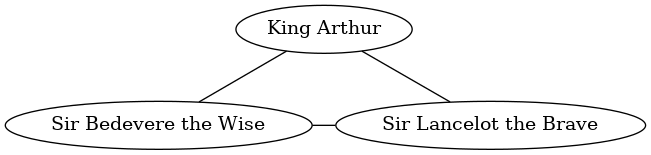

In [7]:
from IPython.display import Image
Image("test-output/round-table.png")

https://graphviz.readthedocs.io/en/stable/manual.html

In [8]:
ps = Graph(name='fam', node_attr={'shape': 'plaintext'})

ps.node('mom')
ps.node('dad')
ps.node('son')
ps.edge('mom', 'son')
ps.edge('son', 'dad')
ps.edge('mom', 'dad')

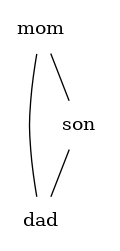

In [9]:
ps.format = 'png'
ps.render('test-output/parrot', view=True)
Image("test-output/parrot.png")

# Alternatives exist

_graphviz_ is lightweight library which calls graphviz as subprocess to execute all actions and produce output. This library is great for quick and easy producing SVG or PNG output.

_pygraphviz_ is complete C bindings which uses graphviz as library and expose all graphviz internal functionality like add/remove nodes/edges. But it comes with higher complexity in deployment as pip needs to compile C bindings and find all libraries.

_pydot_ http://pypi.python.org/pypi/pydot is a pure Python dot parser.

<BR>
<BR>

source: https://stackoverflow.com/questions/37353199/graphviz-vs-pygraphviz

## Alternative module: Pydot

In [10]:
!pip install pydot

In [11]:
import pydot

source: https://pythonhaven.wordpress.com/2009/12/09/generating_graphs_with_pydot/

In [12]:
# first you create a new graph, you do that with pydot.Dot()
graph = pydot.Dot(graph_type='graph')

# let's add the relationship between the king and vassals
for i in range(3):
    # the pydot.Edge() constructor receives two parameters, a source node and a destination node
    edge = pydot.Edge("king", "lord%d" % i)
    # and we need to add the edge to our graph
    graph.add_edge(edge)

# add some vassals
vassal_num = 0
for i in range(3):
    # we create new edges, now between our previous lords and the new vassals
    # let us create two vassals for each lord
    for j in range(2):
        edge = pydot.Edge("lord%d" % i, "vassal%d" % vassal_num)
        graph.add_edge(edge)
        vassal_num += 1

graph.write_png('example1_graph.png')

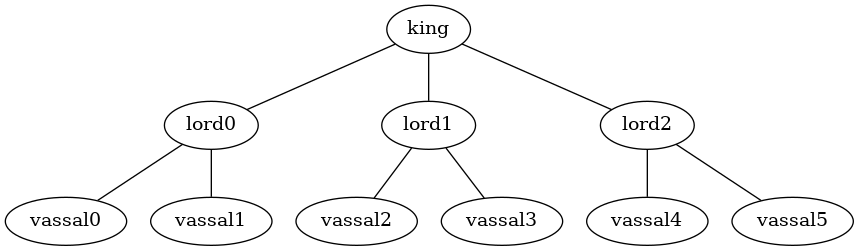

In [13]:
Image("example1_graph.png")